In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
AAPL = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/aapl.us.txt")
MSFT = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/msft.us.txt")
AMZN = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/amzn.us.txt")
TSLA = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/tsla.us.txt")
GOOGL = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/googl.us.txt")

In [54]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
MSFT['Date'] = pd.to_datetime(MSFT['Date'])
AMZN['Date'] = pd.to_datetime(AMZN['Date'])
TSLA['Date'] = pd.to_datetime(TSLA['Date'])
GOOGL['Date'] = pd.to_datetime(GOOGL['Date'])

In [55]:
AAPL

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0


In [56]:
stocks = [AAPL, AMZN, MSFT, TSLA, GOOGL]

In [57]:
AAPL["Ticker"] = "AAPL"
MSFT["Ticker"] = "MSFT"
AMZN["Ticker"] = "AMZN"
TSLA["Ticker"] = "TSLA"
GOOGL["Ticker"] = "GOGGL"

In [58]:
df = pd.concat(stocks)

In [59]:
df.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt,Ticker
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
5,1984-09-14,0.44052,0.45589,0.44052,0.44566,68847968,0,AAPL
6,1984-09-17,0.45718,0.46357,0.45718,0.45718,53755262,0,AAPL
7,1984-09-18,0.45718,0.46103,0.44052,0.44052,27136886,0,AAPL
8,1984-09-19,0.44052,0.44566,0.43157,0.43157,29641922,0,AAPL
9,1984-09-20,0.43286,0.43668,0.43286,0.43286,18453585,0,AAPL


In [60]:
df["Date"].dtype

dtype('<M8[ns]')

In [61]:
df.set_index(["Ticker", "Date"], inplace = True)

df.sort_index(inplace = True)

In [62]:
df.isnull().sum().sort_values(ascending = False)

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [63]:
df.isna().sum().sort_values(ascending = False)

Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [64]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [65]:
draw_missing_data_table(df)

,Total,Percent
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
OpenInt,0,0.0


In [ ]:
last_date_in_df = df.index.get_level_values('Date').max()
print(last_date_in_df)

2017-11-10 00:00:00


In [67]:
most_recent_date_in_df = df.index.get_level_values('Date').max()
ten_years_prior_to_recent = most_recent_date_in_df - pd.DateOffset(years=10)

df = df[df.index.get_level_values('Date') >= ten_years_prior_to_recent]

In [69]:
last_date_in_df = df.index.get_level_values('Date').min()
print(last_date_in_df)

2007-11-12 00:00:00


In [70]:
df

Open     High      Low    Close     Volume  OpenInt
Ticker Date                                                              
AAPL   2007-11-12   21.130   21.479   19.291   19.691  492362604        0
       2007-11-13   20.615   21.897   19.691   21.765  484373501        0
       2007-11-14   22.733   22.739   20.970   21.274  403585172        0
       2007-11-15   21.280   21.717   20.528   21.040  414487458        0
       2007-11-16   21.193   21.388   20.405   21.309  385660112        0
...                    ...      ...      ...      ...        ...      ...
TSLA   2017-11-06  307.000  307.500  299.010  302.780    6482486        0
       2017-11-07  301.020  306.500  300.030  306.050    5286320        0
       2017-11-08  305.500  306.890  301.300  304.310    4725510        0
       2017-11-09  302.500  304.460  296.300  302.990    5440335        0
       2017-11-10  302.500  308.360  301.850  302.990    4621912        0

[11934 rows x 6 columns]

In [75]:
def df_transform(df):
    df["Daily Return"] = df.groupby(level="Ticker")["Close"].pct_change()

    df["7d_MA"] = df.groupby(level="Ticker")["Close"].transform(lambda x: x.rolling(window=7).mean())

    df["30d_MA"] = df.groupby(level="Ticker")["Close"].transform(lambda x: x.rolling(window=30).mean())

    df["Roll_vol"] = df.groupby(level="Ticker")["Daily Return"].transform(lambda x: x.rolling(window=30).std())

    return df


In [76]:
df = df_transform(df)

In [80]:
df['Daily Return'] = df['Daily Return'].fillna(0)
df['7d_MA'] = df['7d_MA'].fillna(0)
df['30d_MA'] = df['30d_MA'].fillna(0)
df["Roll_vol"] = df["Roll_vol"].fillna(0)

In [81]:
df.head(10)

Open    High     Low   Close     Volume  OpenInt  \
Ticker Date                                                             
AAPL   2007-11-12  21.130  21.479  19.291  19.691  492362604        0   
       2007-11-13  20.615  21.897  19.691  21.765  484373501        0   
       2007-11-14  22.733  22.739  20.970  21.274  403585172        0   
       2007-11-15  21.280  21.717  20.528  21.040  414487458        0   
       2007-11-16  21.193  21.388  20.405  21.309  385660112        0   
       2007-11-19  21.262  21.540  20.758  20.996  321694225        0   
       2007-11-20  21.247  22.000  20.942  21.623  429930531        0   
       2007-11-21  21.195  22.072  21.086  21.572  339509885        0   
       2007-11-23  22.027  22.033  21.739  21.967  129891462        0   
       2007-11-26  22.268  22.700  22.072  22.097  363869639        0   

                   Daily Return      7d_MA  30d_MA  Roll_vol  
Ticker Date                                                   
AAPL   2007-11-12      0.000000   0.000000     0.0       0.0  
       2007-11-13      0.105327   0.000000     0.0       0.0  
       2007-11-14     -0.022559   0.000000     0.0       0.0  
       2007-11-15     -0.010999   0.000000     0.0       0.0  
       2007-11-16      0.012785   0.000000     0.0       0.0  
       2007-11-19     -0.014689   0.000000     0.0       0.0  
       2007-11-20      0.029863  21.099714     0.0       0.0  
       2007-11-21     -0.002359  21.368429     0.0       0.0  
       2007-11-23      0.018311  21.397286     0.0       0.0  
       2007-11-26      0.005918  21.514857     0.0       0.0

In [83]:
# Calculate the average daily return for each ticker over the 10-year period
average_returns_per_ticker = df.groupby(level='Ticker')['Daily Return'].mean()

# Find the stock with the highest average return
highest_return_stock = average_returns_per_ticker.idxmax()
highest_average_return = average_returns_per_ticker.max()

print(f"Stock with the highest average return over the 10-year period: {highest_return_stock}")
print(f"Highest average daily return: {highest_average_return:.4%}") # Format as percentage

print("\nAverage daily returns per stock:")
print(average_returns_per_ticker.sort_values(ascending=False))

Stock with the highest average return over the 10-year period: TSLA
Highest average daily return: 0.2100%

Average daily returns per stock:
Ticker
TSLA     0.002100
AMZN     0.001359
AAPL     0.001063
GOGGL    0.000644
MSFT     0.000589
Name: Daily Return, dtype: float64


In [85]:
# Create a 'YearMonth' column (or directly group by resampled 'M' for month end)
# This will allow us to group by Ticker AND Month
df['YearMonth'] = df.index.get_level_values('Date').to_period('M')

# Calculate monthly volatility for each stock
# Group by Ticker and then by YearMonth
# Volatility is the standard deviation of daily returns within that month
monthly_volatility = df.groupby(level='Ticker').apply(
    lambda x: x.groupby('YearMonth')['Daily Return'].std()
)

# Rename the column for clarity
monthly_volatility = monthly_volatility.rename('Monthly Volatility')

# Find the maximum monthly volatility across all stocks and months
most_volatile_month_value = monthly_volatility.max()

# Find the index (Ticker, YearMonth) of that maximum value
most_volatile_index = monthly_volatility.idxmax()

# Extract the Ticker and YearMonth from the index
most_volatile_stock = most_volatile_index[0]
most_volatile_period = most_volatile_index[1] # This is a pandas Period object

print(f"\nStock with the most volatile month: {most_volatile_stock}")
print(f"Most volatile month: {most_volatile_period}")
print(f"Maximum monthly volatility: {most_volatile_month_value:.4f}")

# Optional: See the top 5 most volatile months
print("\nTop 5 most volatile months across all stocks:")
print(monthly_volatility.nlargest(5))


Stock with the most volatile month: TSLA
Most volatile month: 2010-06
Maximum monthly volatility: 0.2347

Top 5 most volatile months across all stocks:
Ticker  YearMonth
TSLA    2010-06      0.234725
        2013-05      0.078284
AMZN    2008-11      0.066253
TSLA    2010-07      0.065355
AMZN    2008-10      0.061054
Name: Monthly Volatility, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


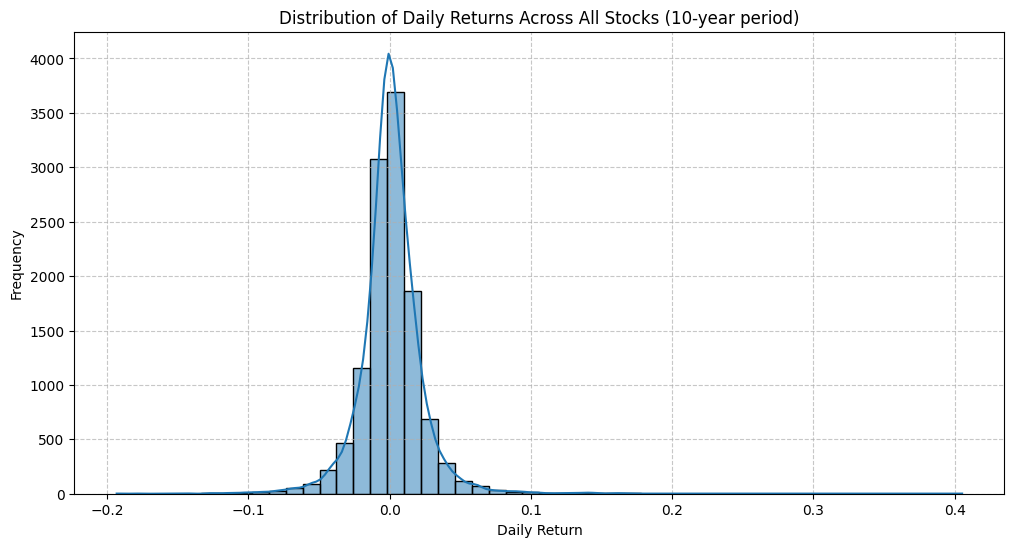

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns Across All Stocks (10-year period)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# You can also do this per stock:
# for ticker, data in df.groupby(level='Ticker'):
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True)
#     plt.title(f'Distribution of Daily Returns for {ticker}')
#     plt.xlabel('Daily Return')
#     plt.ylabel('Frequency')
#     plt.grid(True, linestyle='--', alpha=0.7)
#     plt.show()

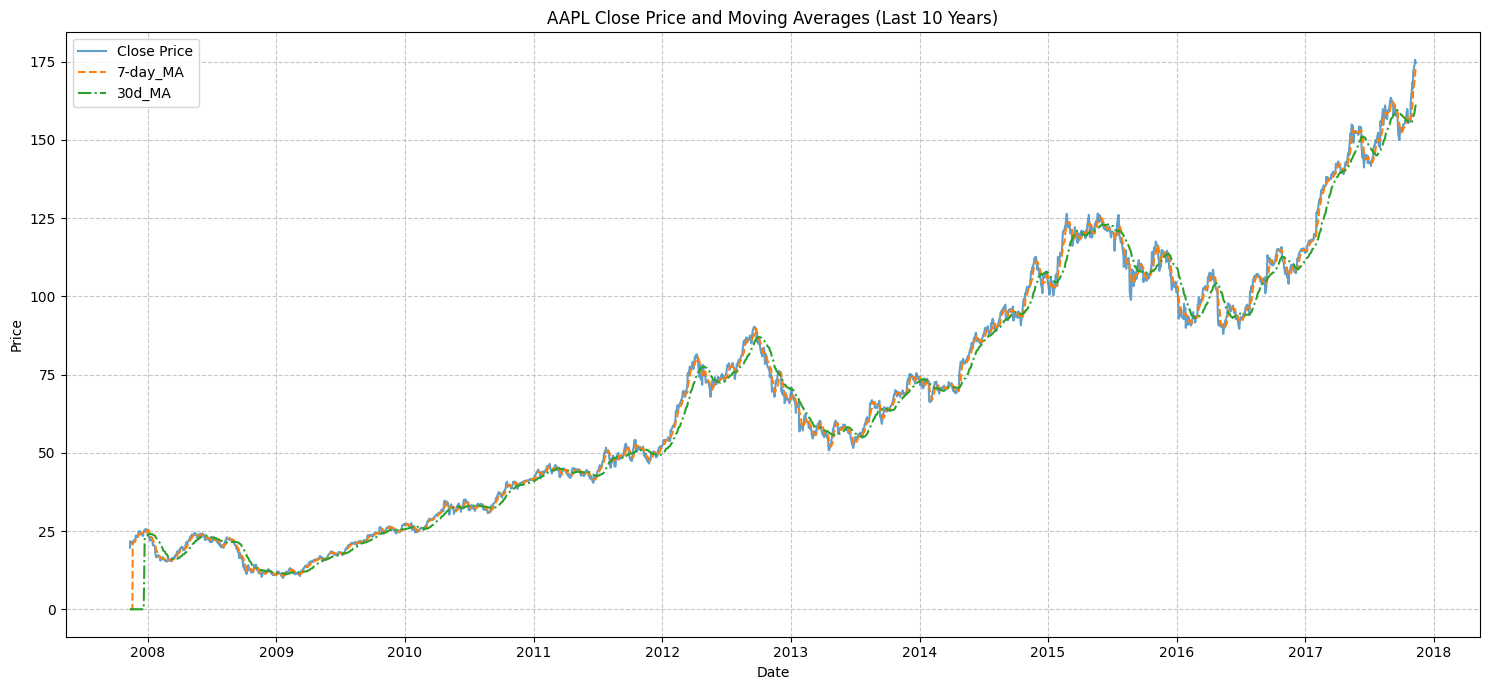

In [88]:
plt.figure(figsize=(15, 7))

# Select a specific stock for plotting (e.g., 'AAPL')
# You'll need to decide which stock(s) to plot or loop through them
ticker_to_plot = 'AAPL' # Change this to any ticker in your df
if ticker_to_plot in df.index.get_level_values('Ticker').unique():
    stock_df = df.loc[ticker_to_plot]

    plt.plot(stock_df.index.get_level_values('Date'), stock_df['Close'], label='Close Price', alpha=0.7)
    plt.plot(stock_df.index.get_level_values('Date'), stock_df['7d_MA'], label='7-day_MA', linestyle='--')
    plt.plot(stock_df.index.get_level_values('Date'), stock_df['30d_MA'], label='30d_MA', linestyle='-.')

    plt.title(f'{ticker_to_plot} Close Price and Moving Averages (Last 10 Years)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"Ticker '{ticker_to_plot}' not found in the DataFrame. Please choose an existing ticker.")

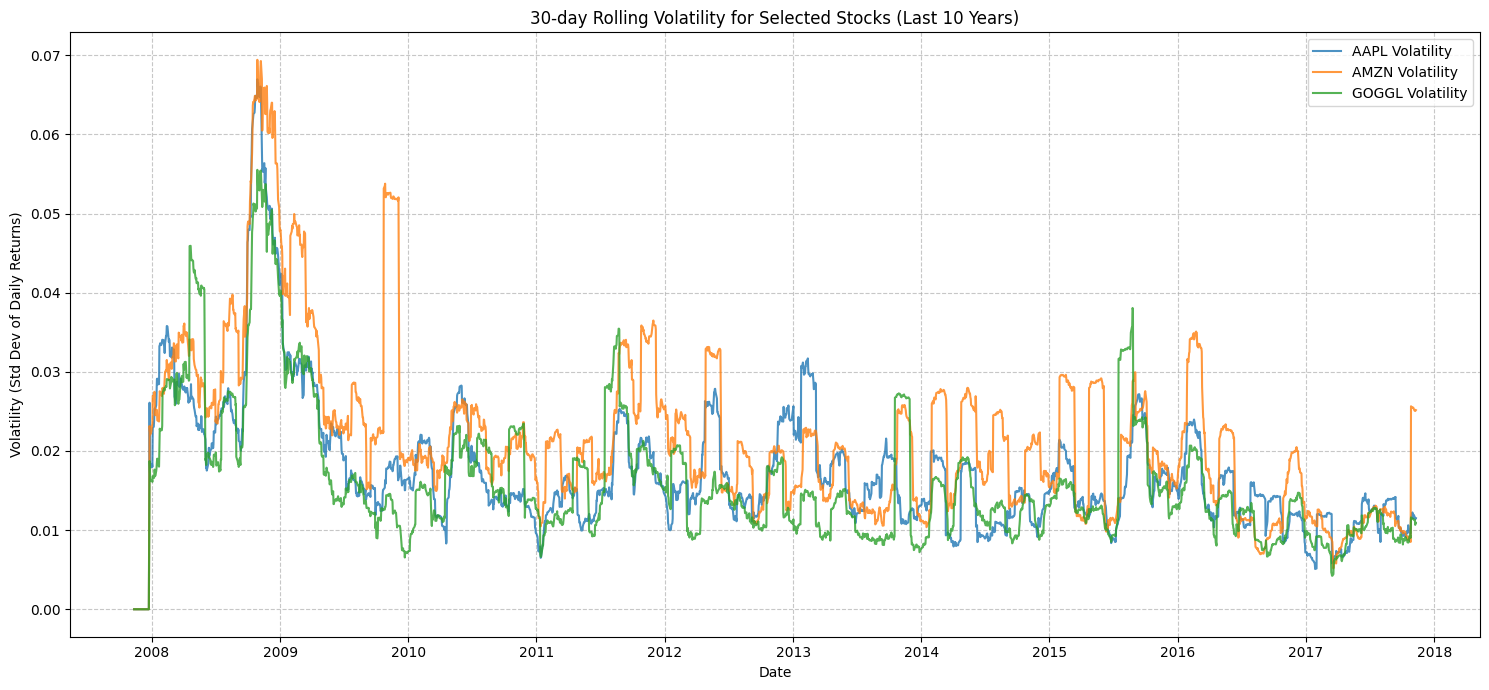

In [91]:
plt.figure(figsize=(15, 7))

# Plot rolling volatility for a few stocks
selected_tickers = df.index.get_level_values('Ticker').unique()[:3] # Plot first 3 for example

for ticker in selected_tickers:
    stock_df = df.loc[ticker]
    plt.plot(stock_df.index.get_level_values('Date'), stock_df['Roll_vol'], label=f'{ticker} Volatility', alpha=0.8)

plt.title('30-day Rolling Volatility for Selected Stocks (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of Daily Returns)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

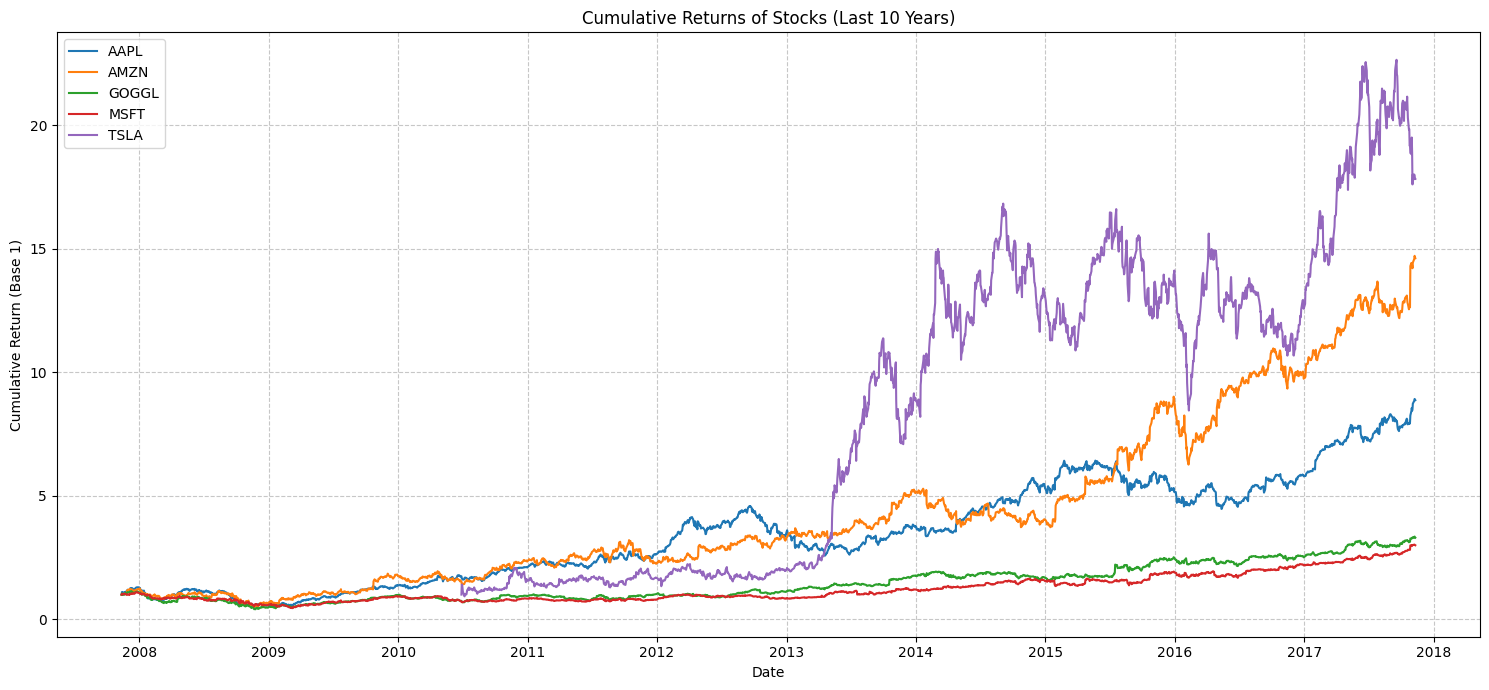

In [92]:
cumulative_returns = (1 + df['Daily Return']).groupby(level='Ticker').cumprod()

plt.figure(figsize=(15, 7))

for ticker, data in cumulative_returns.groupby(level='Ticker'):
    plt.plot(data.index.get_level_values('Date'), data, label=ticker)

plt.title('Cumulative Returns of Stocks (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (Base 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()